# Collaboration and Competition


### 1. Start the Environment

In [1]:
!pip -q install ./python

In [10]:
import pickle
import matplotlib.pyplot as plt

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
import torch
from unityagents import UnityEnvironment
from agent import MADDPG as Agent
import numpy as np
from collections import deque

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. The agent is trained in the Environment

In [5]:
agent = Agent(action_size= action_size, seed=0)

Actor(
  (fc1): Linear(in_features=24, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=2, bias=True)
)
Critic(
  (fc1): Linear(in_features=52, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)
Actor(
  (fc1): Linear(in_features=24, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=2, bias=True)
)
Critic(
  (fc1): Linear(in_features=52, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)


In [6]:
n_episodes=5000
max_t=1000
interval=100
goal_score=0.5

scores_deque = deque(maxlen=100)
scores = []

for i_episode in range(1, n_episodes):  
    env_info = env.reset(train_mode=True)[brain_name]        
    states = env_info.vector_observations        
    for a in agent.agents:
        a.reset()
    score = np.zeros(num_agents)     
    while True:
        actions = agent.act(states, add_noise=True)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                  
        dones = env_info.local_done   
        score += env_info.rewards   
        agent.step(states, actions, rewards, next_states, dones)
        states = next_states           
        if np.any(dones):                                  
            break          

    scores_deque.append(np.max(score))
    scores.append(np.max(score))  
    
    print("Episode {},  average score {}, max score {}".format(i_episode, np.mean(scores_deque), np.max(score)))
    for i, a in enumerate(agent.agents):
        torch.save(a.actor_local.state_dict(), str(i) + '.actor.pth')
        torch.save(a.critic_local.state_dict(), str(i) + '.critic.pth')
    if (i_episode > interval-1) & (np.mean(scores_deque) >= goal_score):
        print('\nEnvironment solved!')
        break

Episode 1,  average score 0.0, max score 0.0
Episode 2,  average score 0.0, max score 0.0
Episode 3,  average score 0.0, max score 0.0
Episode 4,  average score 0.0, max score 0.0
Episode 5,  average score 0.0, max score 0.0
Episode 6,  average score 0.0, max score 0.0
Episode 7,  average score 0.0, max score 0.0
Episode 8,  average score 0.0, max score 0.0
Episode 9,  average score 0.0, max score 0.0
Episode 10,  average score 0.0, max score 0.0
Episode 11,  average score 0.009090909226374193, max score 0.10000000149011612
Episode 12,  average score 0.008333333457509676, max score 0.0
Episode 13,  average score 0.007692307806932009, max score 0.0
Episode 14,  average score 0.007142857249294009, max score 0.0
Episode 15,  average score 0.0066666667660077415, max score 0.0
Episode 16,  average score 0.0062500000931322575, max score 0.0
Episode 17,  average score 0.00588235302883036, max score 0.0
Episode 18,  average score 0.010555555733541647, max score 0.09000000171363354
Episode 19, 

In [8]:
with open('scores_deque.pkl', 'wb') as f:
    pickle.dump(scores_deque, f)

### 4. Plotting the scores

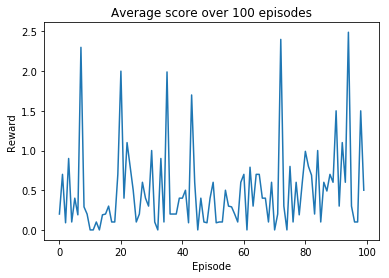

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_deque)), scores_deque)
plt.title("Average score over 100 episodes")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

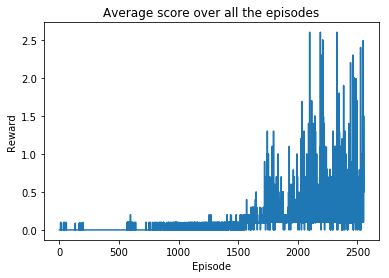

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.title("Average score over all the episodes")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

In [ ]:
env.close()